## CHIP690-335 Final Project: WIC-PC Weight Status in North Carolina (2016–2020)
By Michelle Tumur

Research Question
- How does weight status (including obesity and overweight indicators) vary by race/ethnicity among WIC-participating children in North Carolina from 2016 to 2020?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
colors = sns.color_palette("Set2") 

# Loading the dataset
df = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Women__Infant__and_Child_20250506.csv")
print("Original Dataset Shape:", df.shape)
df.head(5)  # Show first 5 rows

Original Dataset Shape: (12852, 31)


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2018,2018,WA,Washington,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,"(47.52227862900048, -120.47001078999972)",OWS,OWS1,Q060,VALUE,53,Age (months),18 - 23,AGEMO,AGEMO1823
1,2018,2018,HI,Hawaii,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,"(21.304850435000446, -157.85774940299973)",OWS,OWS1,Q060,VALUE,15,Race/Ethnicity,Hispanic,RACE,RACEHIS
2,2020,2020,MA,Massachusetts,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,"(42.27687047000046, -72.08269067499964)",OWS,OWS1,Q040,VALUE,25,Race/Ethnicity,Hispanic,RACE,RACEHIS
3,2020,2020,TN,Tennessee,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,"(35.68094058000048, -85.77449091399967)",OWS,OWS1,Q040,VALUE,47,Race/Ethnicity,Hispanic,RACE,RACEHIS
4,2012,2012,GU,Guam,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q041,VALUE,66,Sex,Male,SEX,MALE


In [2]:
# Showing initial structure of the code
print("Initial shape:", df.shape)
print(df.columns)

Initial shape: (12852, 31)
Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(months)', 'Sex', 'Race/Ethnicity',
       'GeoLocation', 'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID',
       'LocationID', 'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


In [3]:
# Renaming columns
df.rename(columns={
    "Age(months)": "Age_Months",
    "Race/Ethnicity": "Race_Ethnicity"
}, inplace=True)

## Filter for North Carolina and 2016–2020

The analysis focuses on data only from the state of North Carolina between 2016 and 2020. It is also ensured that only valid percentages (non-null `Data_Value`) and health questions are included in the analysis.


In [4]:
filtered = df[
    (df["LocationDesc"] == "North Carolina") &
    (df["YearStart"] >= 2016) &
    (df["YearStart"] <= 2020) &
    (df["Data_Value"].notna()) &
    (df["Question"].notna())
]

print("🔹 Filtered Dataset Shape:", filtered.shape)
display(filtered[["YearStart", "Race_Ethnicity", "Question", "Data_Value"]].head(10))

🔹 Filtered Dataset Shape: (102, 31)


,YearStart,Race_Ethnicity,Question,Data_Value
108,2018,Non-Hispanic White,Percent of WIC children aged 2 to 4 years who ...,15.4
144,2018,Hispanic,Percent of WIC children aged 3-23 months old w...,13.9
161,2018,NaN,Percent of WIC children aged 2 to 4 years who ...,15.1
169,2018,NaN,Percent of WIC children aged 2 to 4 years who ...,15.7
206,2018,NaN,Percent of WIC children aged 3-23 months old w...,13.4
305,2018,NaN,Percent of WIC children aged 2 to 4 years who ...,15.2
490,2018,Non-Hispanic White,Percent of WIC children aged 2 to 4 years who ...,13.7
573,2018,NaN,Percent of WIC children aged 2 to 4 years who ...,14.2
602,2018,NaN,Percent of WIC children aged 2 to 4 years who ...,15.2
605,2018,American Indian/Alaska Native,Percent of WIC children aged 3-23 months old w...,18.8


## Group by Year, Race/Ethnicity, and Health Question

The data is grouped to calculate the average percentage of children in each race/ethnicity category with a specific weight-related condition in each year. This will allow us to visualize trends over time for different health indicators.


In [5]:
grouped = (
    filtered
    .groupby(["YearStart", "Race_Ethnicity", "Question"])["Data_Value"]
    .mean()
    .reset_index()
)

print("🔹 Grouped by Year, Race, and Question:")
display(grouped.head(10))

🔹 Grouped by Year, Race, and Question:


,YearStart,Race_Ethnicity,Question,Data_Value
0,2016,American Indian/Alaska Native,Percent of WIC children aged 2 to 4 years who ...,18.0
1,2016,American Indian/Alaska Native,Percent of WIC children aged 2 to 4 years who ...,18.0
2,2016,American Indian/Alaska Native,Percent of WIC children aged 3-23 months old w...,19.3
3,2016,Asian/Pacific Islander,Percent of WIC children aged 2 to 4 years who ...,13.5
4,2016,Asian/Pacific Islander,Percent of WIC children aged 2 to 4 years who ...,11.2
5,2016,Asian/Pacific Islander,Percent of WIC children aged 3-23 months old w...,7.6
6,2016,Hispanic,Percent of WIC children aged 2 to 4 years who ...,17.3
7,2016,Hispanic,Percent of WIC children aged 2 to 4 years who ...,18.2
8,2016,Hispanic,Percent of WIC children aged 3-23 months old w...,13.2
9,2016,Non-Hispanic Black,Percent of WIC children aged 2 to 4 years who ...,13.6


## Visualize Trends by Health Condition

Below, line plots were created for each health question (e.g., high weight-for-length, overweight, etc.). Each line represents a racial/ethnic group. This allows us to examine trends from 2016 to 2020 and identify any disparities or consistent patterns.

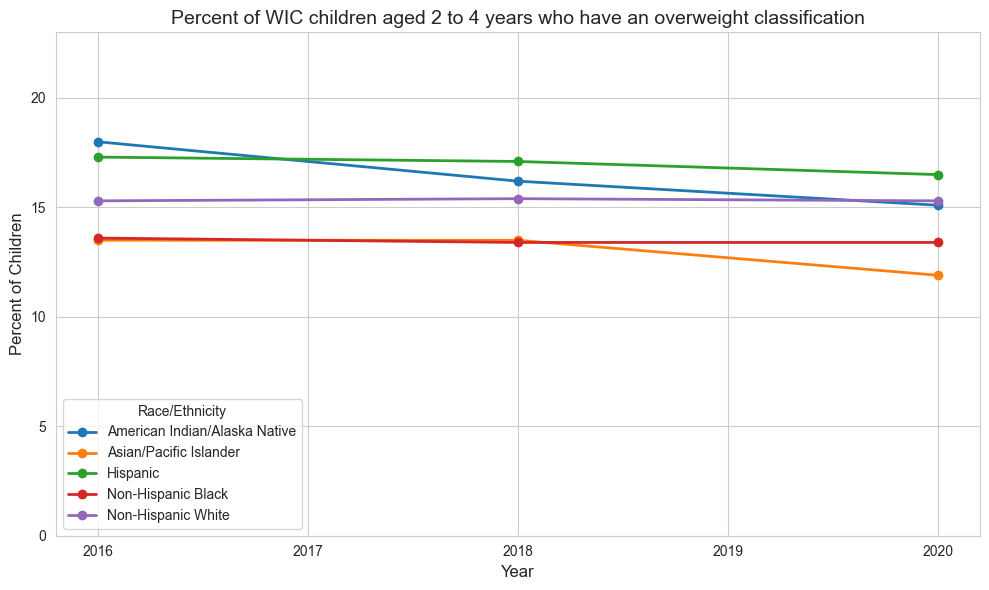

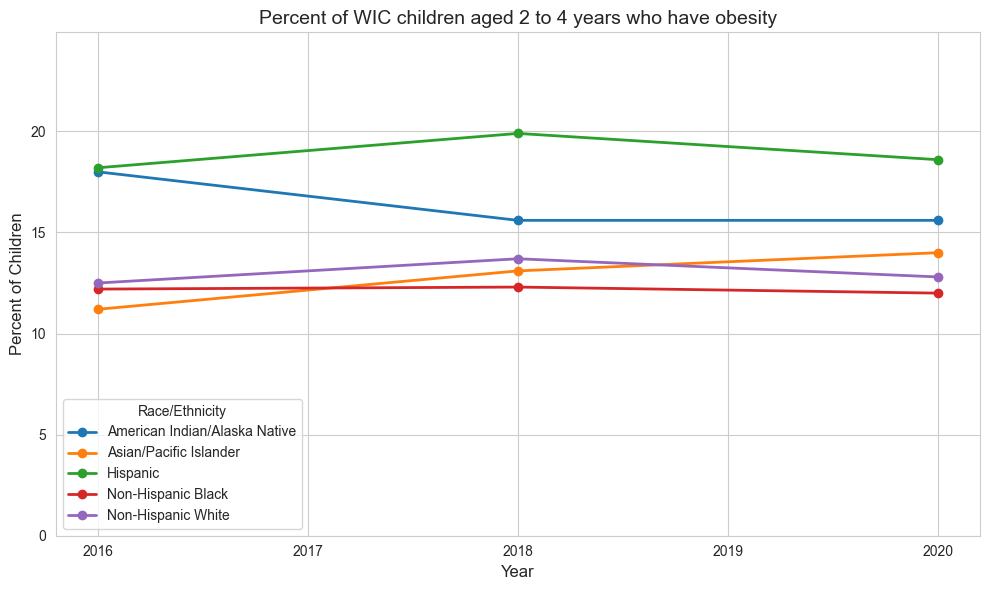

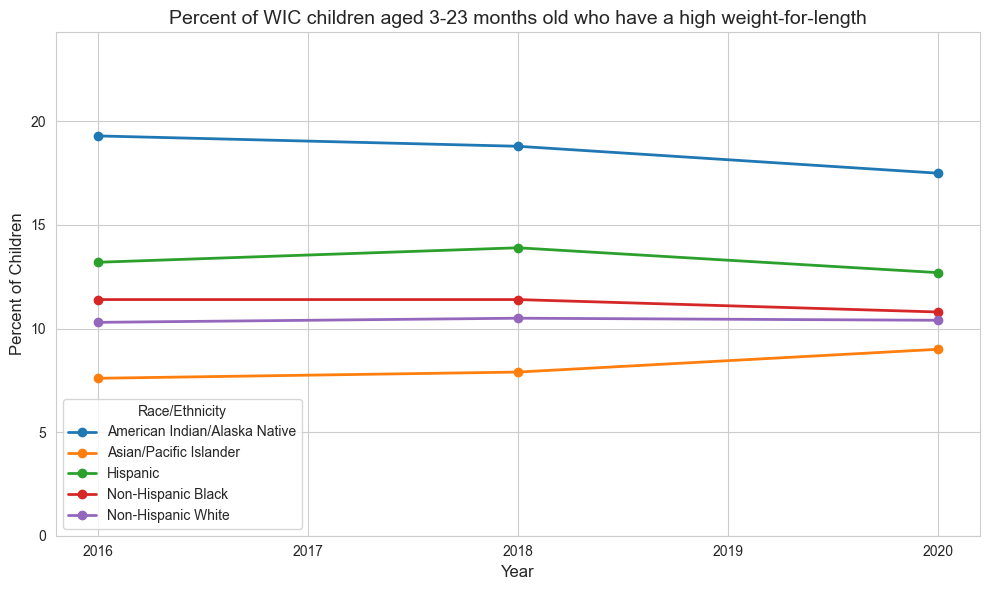

In [6]:
# Unique health-related questions (conditions)
questions = grouped["Question"].unique()
colors = sns.color_palette("tab10")
sns.set_style("whitegrid")

# Create one line chart per health condition
for q in questions:
    subset = grouped[grouped["Question"] == q]

    plt.figure(figsize=(10, 6))
    for i, race in enumerate(subset["Race_Ethnicity"].unique()):
        race_data = subset[subset["Race_Ethnicity"] == race]
        plt.plot(
            race_data["YearStart"],
            race_data["Data_Value"],
            marker='o',
            label=race,
            color=colors[i % len(colors)],
            linewidth=2
        )

    plt.title(q, fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Percent of Children", fontsize=12)
    plt.xticks([2016, 2017, 2018, 2019, 2020])
    plt.ylim(0, subset["Data_Value"].max() + 5)
    plt.legend(title="Race/Ethnicity")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"nc_wic_question_trend_{q[:30].replace(' ', '_')}.png")  # Save first 30 chars
    plt.show()


## Summary of Findings, Limitations, and Ideas for the Future

In this project, we looked at data from North Carolina to understand trends in weight-related health issues among WIC-enrolled children under the age of 2, from 2016 to 2020. We focused on questions like how many children had high weight-for-length or were considered overweight, and we broke the data down by race and ethnicity. Overall, the percentages stayed pretty steady over the five years, but we did see some differences between racial groups. For example, Hispanic and Black children often had higher percentages in some categories, which might be related to bigger issues like access to healthy food or differences in living conditions.

There are a few important limitations to keep in mind. First, this data only comes from one state, so we can’t assume the same patterns would happen everywhere. Also, it’s based on summary data — not individual records — which means we can’t look more deeply into personal factors like family income or neighborhood environment. Plus, we can’t really explain *why* these differences happen, only that they exist.

In the future, it would be helpful to look at other states or compare states with different policies. If we could connect this dataset with other information (like income or location), we might learn more about what’s driving the differences. This kind of research could help make public health programs like WIC more targeted and effective.